# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [5]:
# Import warnings
import warnings


In [6]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [8]:
import os

os.chdir('/')
os.getcwd()

'/'

In [9]:
# Try loading one file

df = pd.read_parquet('content/Assignments/EDA/data_NYC_Taxi/trip_records/2023-1.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [10]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df.sample(frac = 0.01, random_state = 42)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
323412          1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1491266         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2385670         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
766545          2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
980153          1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   
...           ...                  ...                   ...              ...   
2879267         2  2023-01-30 19:37:14   2023-01-30 19:43:05              1.0   
395425          2  2023-01-05 20:11:32   2023-01-05 20:24:01              1.0   
2469070         2  2023-01-26 17:15:15   2023-01-26 17:22:00              1.0   
726761          2  2023-01-09 12:39:49   2023-01-09 13:14:36              1.0   
2330329         2  2023-01-25 13:04:36   2023-01-25 13:10:51              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
323412            1.90         1.0                  N           239   
1491266           1.86         1.0                  N           239   
2385670           0.50         1.0                  N           162   
766545            2.56         1.0                  N           162   
980153            2.80         1.0                  N           164   
...                ...         ...                ...           ...   
2879267           1.71         1.0                  N           161   
395425            2.78         1.0                  N           161   
2469070           0.91         1.0                  N            48   
726761           10.84         1.0                  N           264   
2330329           1.34         1.0                  N           238   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
323412            236             1         13.5    2.5      0.5        2.50   
1491266           162             1         14.2    0.0      0.5        3.64   
2385670           170             1          5.1    1.0      0.5        2.02   
766545            262             1         17.0    2.5      0.5        4.70   
980153            231             1         14.9    3.5      0.5        3.98   
...               ...           ...          ...    ...      ...         ...   
2879267           236             1          9.3    2.5      0.5        3.16   
395425            262             1         14.9    1.0      0.5        3.98   
2469070           246             2          7.9    2.5      0.5        0.00   
726761            138             1         48.5    5.0      0.5       16.01   
2330329           239             1          8.6    0.0      0.5        3.78   

         tolls_amount  improvement_surcharge  total_amount  \
323412           0.00                    1.0         20.00   
1491266          0.00                    1.0         21.84   
2385670          0.00                    1.0         12.12   
766545           0.00                    1.0         28.20   
980153           0.00                    1.0         23.88   
...               ...                    ...           ...   
2879267          0.00                    1.0         18.96   
395425           0.00                    1.0         23.88   
2469070          0.00                    1.0         14.40   
726761           6.55                    1.0         80.06   
2330329          0.00                    1.0         16.38   

         congestion_surcharge  airport_fee  
323412                    2.5          0.0  
1491266                   2.5          0.0  
2385670                   2.5          0.0  
766545                    2.5          0.0  
980153                    2.5          0.0  
...                       ...          ...  
2879267                   2.5          0.0  
395425                    2.5          0.0  
2469070                   2.5          0.0  
726761                    2

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        current_file_data = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        grouped_by_date = current_file_data.groupby(pd.Grouper(key='tpep_pickup_datetime', freq = 'D'))
        for date, date_group in grouped_by_date:

            # Iterate through each hour of the selected date
            grouped_by_hour = date_group.groupby(date_group['tpep_pickup_datetime'].dt.hour)
            for hour, hour_data in grouped_by_hour:

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 228 to 3376198
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            fl

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
df.to_parquet('hourly-5percent-sample.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [14]:
# Load the new data file
df = pd.read_parquet('hourly-5percent-sample.parquet')


In [15]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
228          2  2023-08-01 00:12:29   2023-08-01 00:15:43              1.0   
1316         1  2023-08-01 00:52:22   2023-08-01 01:24:45              1.0   
301          2  2023-08-01 00:50:08   2023-08-01 00:52:16              1.0   
956          2  2023-08-01 00:38:45   2023-08-01 01:19:02              2.0   
1300         2  2023-08-01 00:16:41   2023-08-01 00:27:31              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
228            0.63         1.0                  N            79   
1316          13.00         1.0                  N           132   
301            0.77         1.0                  N           107   
956           19.64         2.0                  N           132   
1300           2.24         1.0                  N           230   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
228            148             1          5.8   1.00      0.5         0.5   
1316            85             1         51.3   2.75      0.5         5.0   
301            137             2          5.1   1.00      0.5         0.0   
956            143             1         70.0   0.00      0.5        14.0   
1300           137             2         12.8   1.00      0.5         0.0   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
228           0.00                    1.0         11.30                   2.5   
1316          0.00                    1.0         60.55                   0.0   
301           0.00                    1.0         10.10                   2.5   
956           6.55                    1.0         96.30                   2.5   
1300          0.00                    1.0         17.80                   2.5   

      Airport_fee  airport_fee  
228          0.00          NaN  
1316         1.75          NaN  
301          0.00          NaN  
956          1.75          NaN  
1300         0.00          NaN

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 228 to 3376198
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [17]:
# Fix the index and drop any columns that are not needed

#delete duplicate columns
duplicate_columns = ['Passenger_count', 'Trip_distance', 'Store_and_fwd_flag', 'Payment_type', 'Fare_amount', 'Extra', 'Mta_tax', 'Tip_amount', 'Tolls_amount', 'Improvement_surcharge', 'Total_amount', 'Congestion_surcharge']
df = df.drop(columns=duplicate_columns, errors='ignore')

# convert nmae of column for the first letter of all the columns to start with caps except pickup and drop time
# ommit airport fee column as it need to be fixed in next step

df.columns = df.columns.map(lambda text: text[0].upper() + text[1:] if text and not text.startswith(("tpep_", "airport", "Airport")) else text)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [18]:
# Combine the two airport fee columns


# df['airport_fee'].value_counts()
# df['Airport_fee'].value_counts()
# it is observed that the column airport_fee have value wither 0 or 1.25 which matches the defention of that column
# the column Airport_fee have many negative values and 1.75 which does not match the column defenition
# assign the value of Airport_fee to airport_fee under below condition
# Airport_fee should not be negative and Airport_fee should be between 0 to 1.25 else take value of column airport_fee

condition = (df['airport_fee'].isnull() | (df['Airport_fee'] < 0)) & \
            (df['Airport_fee'].notnull()) & \
            (df['Airport_fee'] >= 0) & (df['Airport_fee'] <= 1.25)

df.loc[condition, 'airport_fee'] = df.loc[condition, 'Airport_fee']

# Delete column Airport_fee
df = df.drop('Airport_fee', axis=1)
df.rename(columns={'airport_fee' : 'Airport_fee'}, inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [19]:
# check where values of fare amount are negative

# (df['Fare_amount'] < 0).sum()
# there is no negative value in the column Fare_amount
# since there is no negative value in Fare_amount so taking zero

(df['Fare_amount'] == 0).sum()
#there is no Fare_amount = 0

np.int64(601)

Did you notice something different in the
`RatecodeID` column for above records?

In [20]:
# Analyse RatecodeID for the negative fare amounts

# since there is no negative value in Fare_amount so taking zero
# RatecodeID, 5 is for Negotiated fare so we can ignore that

df[(df['Fare_amount'] == 0) & (df['RatecodeID'] != 5)]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  Passenger_count  \
55345           1  2023-08-01 17:05:07   2023-08-01 17:07:36              1.0   
100873          1  2023-08-02 06:25:24   2023-08-02 06:25:32              1.0   
109124          2  2023-08-02 08:34:38   2023-08-02 08:34:42              3.0   
147817          2  2023-08-02 16:57:03   2023-08-02 17:15:42              1.0   
247198          1  2023-08-03 16:22:52   2023-08-03 16:24:05              1.0   
...           ...                  ...                   ...              ...   
2430102         1  2023-12-21 21:54:33   2023-12-21 21:54:41              1.0   
2527001         2  2023-12-22 19:14:39   2023-12-22 19:57:23              2.0   
2714128         1  2023-12-25 16:24:38   2023-12-25 16:30:26              2.0   
2794655         2  2023-12-26 19:00:32   2023-12-26 19:00:55              1.0   
2951393         1  2023-12-28 21:32:47   2023-12-28 21:33:03              1.0   

         Trip_distance  RatecodeID Store_and_fwd_flag  PULocationID  \
55345             0.00         1.0                  N           261   
100873            0.00         2.0                  N           229   
109124            0.00         1.0                  N           193   
147817            3.31         1.0                  N           238   
247198            0.00         1.0                  N           163   
...                ...         ...                ...           ...   
2430102           0.00         1.0                  N           238   
2527001          16.26         2.0                  N           100   
2714128           2.00         1.0                  N           138   
2794655           0.00         1.0                  N             7   
2951393           0.00         1.0                  N            68   

         DOLocationID  Payment_type  Fare_amount  Extra  Mta_tax  Tip_amount  \
55345             261             1          0.0    0.0      0.0         0.0   
100873            229             3          0.0    0.0      0.0         0.0   
109124            193             2          0.0    0.0      0.0         0.0   
147817            263             2          0.0    0.0     -0.5         0.0   
247198            237             4          0.0    0.0      0.0         0.0   
...               ...           ...          ...    ...      ...         ...   
2430102           238             3          0.0    0.0      0.0         0.0   
2527001           132             2          0.0    0.0     -0.5         0.0   
2714128            70             4          0.0    0.0      0.0         0.0   
2794655             7             1          0.0    0.0      0.0         0.0   
2951393            68             3          0.0    0.0      0.0         0.0   

         Tolls_amount  Improvement_surcharge  Total_amount  \
55345             0.0                    0.0           0.0   
100873            0.0                    0.0           0.0   
109124            0.0                    0.0           0.0   
147817            0.0                   -1.0          -4.0   
247198            0.0                    0.0           0.0   
...               ...                    ...           ...   
2430102           0.0                    0.0           0.0   
2527001           0.0                   -1.0          -4.0   
2714128           0.0                    1.0           1.0   
2794655           0.0                    0.0           0.0   
2951393           0.0                    0.0           0.0   

         Congestion_surcharge  Airport_fee  
55345                     0.0          0.0  
100873                    0.0          0.0  
109124                    0.0          0.0  
147817                   -2.5          0.0  
247198                    0.0          0.0  
...                       ...          ...  
2430102                   0.0          0.0  
2527001                  -2.5          0.0  
2714128                   0.0          0.0  
2794655                   0

In [21]:
# Find which columns have negative values

df[(df.select_dtypes(include=np.number) < 0).any(axis=1) ]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  Passenger_count  \
147817          2  2023-08-02 16:57:03   2023-08-02 17:15:42              1.0   
889103          2  2023-08-10 17:13:13   2023-08-10 17:23:15              1.0   
894839          2  2023-08-10 18:00:48   2023-08-10 18:01:10              2.0   
91210           2  2023-02-01 21:37:48   2023-02-01 21:51:51              1.0   
289424          2  2023-02-03 18:25:15   2023-02-03 18:36:00              2.0   
...           ...                  ...                   ...              ...   
2150504         2  2023-12-19 13:50:21   2023-12-19 14:02:11              1.0   
2271974         2  2023-12-20 14:44:09   2023-12-20 15:24:58              1.0   
2370229         2  2023-12-21 12:08:58   2023-12-21 12:09:18              1.0   
2527001         2  2023-12-22 19:14:39   2023-12-22 19:57:23              2.0   
3361336         1  2023-12-26 17:19:58   2023-12-26 17:42:38              NaN   

         Trip_distance  RatecodeID Store_and_fwd_flag  PULocationID  \
147817            3.31         1.0                  N           238   
889103            0.62         1.0                  N           186   
894839            0.02         2.0                  N           161   
91210             2.84         1.0                  N            90   
289424            1.20         2.0                  N           230   
...                ...         ...                ...           ...   
2150504           0.00         1.0                  N           138   
2271974           8.76         1.0                  N           100   
2370229           0.02         2.0                  N           233   
2527001          16.26         2.0                  N           100   
3361336           2.60         NaN               None           186   

         DOLocationID  Payment_type  Fare_amount  Extra  Mta_tax  Tip_amount  \
147817            263             2          0.0   0.00    -0.50        0.00   
889103            163             2          0.0   0.00    -0.50        0.00   
894839            161             2          0.0   0.00    -0.50        0.00   
91210              13             2          0.0   0.00    -0.50        0.00   
289424            142             2          0.0   0.00    -0.50        0.00   
...               ...           ...          ...    ...      ...         ...   
2150504           179             2          0.0   0.00    -0.50        0.00   
2271974           119             2          0.0   0.00    -0.50        0.00   
2370229           233             2          0.0   0.00    -0.50        0.00   
2527001           132             2          0.0   0.00    -0.50        0.00   
3361336           237             0         20.5 -39.17    42.17        4.05   

         Tolls_amount  Improvement_surcharge  Total_amount  \
147817            0.0                   -1.0         -4.00   
889103            0.0                   -1.0         -4.00   
894839            0.0                   -1.0         -4.00   
91210             0.0                   -1.0         -4.00   
289424            0.0                   -1.0         -4.00   
...               ...                    ...           ...   
2150504           0.0                   -1.0         -3.25   
2271974           0.0                   -1.0         -4.00   
2370229           0.0                   -1.0         -4.00   
2527001           0.0                   -1.0         -4.00   
3361336           0.0                    1.0         31.05   

         Congestion_surcharge  Airport_fee  
147817                   -2.5          0.0  
889103                   -2.5          0.0  
894839                   -2.5          0.0  
91210                    -2.5          0.0  
289424                   -2.5          0.0  
...                       ...          ...  
2150504                   0.0          NaN  
2271974                  -2.5          0.0  
2370229                  -2.5          0.0  
2527001                  -2

In [22]:
# fix these negative values

# should consider rows RatecodeID with 5
# the base way to fix it is to neglect those field with negative rows

df = df[~((df.select_dtypes(include=np.number) < 0).any(axis=1) & (df['RatecodeID'] != 5))]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [23]:
# Find the proportion of missing values in each column

df.isnull().sum() / len(df)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
Passenger_count          0.034449
Trip_distance            0.000000
RatecodeID               0.034449
Store_and_fwd_flag       0.034449
PULocationID             0.000000
DOLocationID             0.000000
Payment_type             0.000000
Fare_amount              0.000000
Extra                    0.000000
Mta_tax                  0.000000
Tip_amount               0.000000
Tolls_amount             0.000000
Improvement_surcharge    0.000000
Total_amount             0.000000
Congestion_surcharge     0.034449
Airport_fee              0.099044
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [24]:
# Display the rows with null values

df[(df.select_dtypes(include=np.number).isnull()).any(axis=1)]

# Impute NaN values in 'passenger_count'

# we should consider NaN a well as zero for passnger count as there can't be a trip with zero passenger
# for this column the best way to imput is to fill it with the median value

median_without_zeros_nans = df['Passenger_count'].median()

df.loc[:, 'Passenger_count'] = df['Passenger_count'].replace({0: median_without_zeros_nans, np.nan: median_without_zeros_nans})


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [25]:
# Fix missing values in 'RatecodeID'

# the best way to imput RatecodeID is as below
# if the airport fee is zero then its a Standard rate - 1
# else its JFK - 2

df.loc[:, 'RatecodeID'] = df.apply(lambda row: 1 if pd.isnull(row['RatecodeID']) and (row['Airport_fee'] == 0 or pd.isnull(row['Airport_fee'])) else (2 if pd.isnull(row['RatecodeID']) else row['RatecodeID']), axis=1)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [26]:
# handle null values in congestion_surcharge

df.loc[:, 'Congestion_surcharge'] = df['Congestion_surcharge'].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [27]:
# Handle any remaining missing values

# better way to fix it is to fill it will Y as it would have stored in car and pass it later
# if its connected then it will pass N
df.loc[:, 'Store_and_fwd_flag'] = df['Store_and_fwd_flag'].fillna('Y')

# better way for airport fee is to set to 1.25 if the RatecodeID is JFK - 2 else 0
df.loc[:, 'Airport_fee'] = df.apply(lambda row: 1.25 if row['RatecodeID'] == 2 else 0 if pd.isna(row['Airport_fee']) else row['Airport_fee'], axis=1)

# fill Payment_type as unknown - 5
df.loc[:, 'Payment_type'] = df['Payment_type'].fillna(5)

# drop the below rows for null columns as it cannot be computed
columns_to_drop_for_null = ['Trip_distance', 'Fare_amount', 'Extra', 'Mta_tax', 'Tip_amount', 'Tolls_amount', 'Improvement_surcharge', 'Total_amount']
df = df.dropna(subset=columns_to_drop_for_null)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [28]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe().round(2)

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1896322.00                     1896322                     1896322   
mean         1.74  2023-07-02 19:58:28.132447  2023-07-02 20:16:00.124788   
min          1.00         2022-12-31 23:07:51         2022-12-31 23:19:58   
25%          1.00         2023-04-02 16:10:17  2023-04-02 16:30:52.500000   
50%          2.00  2023-06-27 15:46:41.500000  2023-06-27 16:04:23.500000   
75%          2.00         2023-10-06 19:39:47  2023-10-06 19:57:26.250000   
max          6.00         2023-12-31 23:56:25         2024-01-01 16:35:22   
std          0.45                         NaN                         NaN   

       Passenger_count  Trip_distance  RatecodeID  PULocationID  DOLocationID  \
count       1896322.00     1896322.00  1896322.00    1896322.00    1896322.00   
mean              1.37           4.17        1.62        165.16        163.98   
min               1.00           0.00        1.00          1.00          1.00   
25%               1.00           1.05        1.00        132.00        114.00   
50%               1.00           1.80        1.00        162.00        162.00   
75%               1.00           3.41        1.00        234.00        234.00   
max               9.00      186514.09       99.00        265.00        265.00   
std               0.87         236.31        7.33         64.01         69.88   

       Payment_type  Fare_amount       Extra     Mta_tax  Tip_amount  \
count    1896322.00   1896322.00  1896322.00  1896322.00  1896322.00   
mean           1.16        19.94        1.59        0.50        3.56   
min            0.00         0.00        0.00       -0.50        0.00   
25%            1.00         9.30        0.00        0.50        1.00   
50%            1.00        13.50        1.00        0.50        2.85   
75%            1.00        22.60        2.50        0.50        4.45   
max            4.00     19152.90    10002.50        4.00      711.88   
std            0.51        23.02        7.49        0.05        4.11   

       Tolls_amount  Improvement_surcharge  Total_amount  \
count     1896322.0             1896322.00    1896322.00   
mean            0.6                   1.00         29.03   
min             0.0                  -1.00         -3.50   
25%             0.0                   1.00         15.96   
50%             0.0                   1.00         21.10   
75%             0.0                   1.00         31.05   
max           104.0                   1.00      29156.90   
std             2.2                   0.03         31.19   

       Congestion_surcharge  Airport_fee  
count            1896322.00   1896322.00  
mean                   2.23         0.07  
min                   -2.50         0.00  
25%                    2.50         0.00  
50%                    2.50         0.00  
75%                    2.50         0.00  
max                    2.50         1.25  
std                    0.78         0.28

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [29]:
# remove passenger_count > 6
df = df[df['Passenger_count'] <= 6]

In [30]:
# Continue with outlier handling

df.drop( df[(df['Trip_distance'] == 0) | (df['Fare_amount'] > 300)].index , inplace = True)
df.drop( df[((df['Trip_distance'] == 0) | (df['Fare_amount'] == 0)) & (df['PULocationID'] != df['DOLocationID'])].index , inplace = True)
df.drop( df[df['Trip_distance'] > 250].index , inplace =True)
df.drop( df[df['Payment_type'] == 0].index , inplace = True)


In [31]:
# Do any columns need standardising?

df.drop( df[df['RatecodeID'] > 6].index , inplace = True)
df.drop( df[df['Tip_amount'] > 50].index , inplace = True)
df.drop( df[df['Tolls_amount'] > 25].index , inplace = True)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [32]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'Passenger_count',
 'Trip_distance',
 'RatecodeID',
 'Store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'Payment_type',
 'Fare_amount',
 'Extra',
 'Mta_tax',
 'Tip_amount',
 'Tolls_amount',
 'Improvement_surcharge',
 'Total_amount',
 'Congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

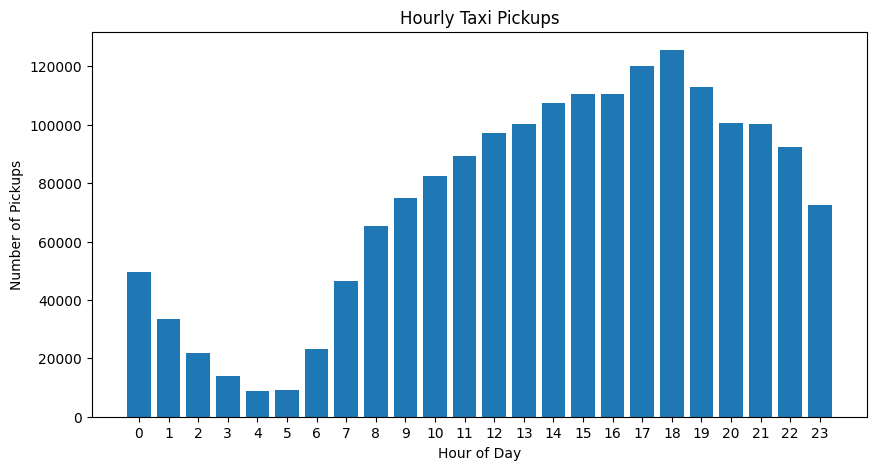

In [33]:
# Find and show the hourly trends in taxi pickups

hourly_counts = df['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.show()

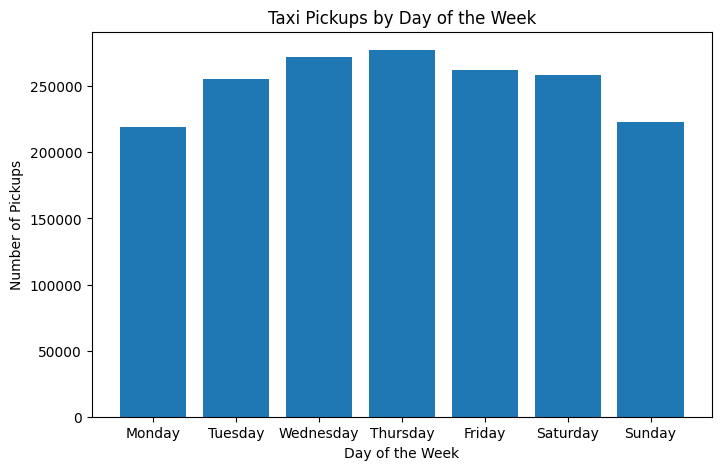

In [34]:
# Find and show the daily trends in taxi pickups (days of the week)

day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily_counts = df['tpep_pickup_datetime'].dt.dayofweek.map(day_name_map).value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 5))
plt.bar(daily_counts.index, daily_counts.values)
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

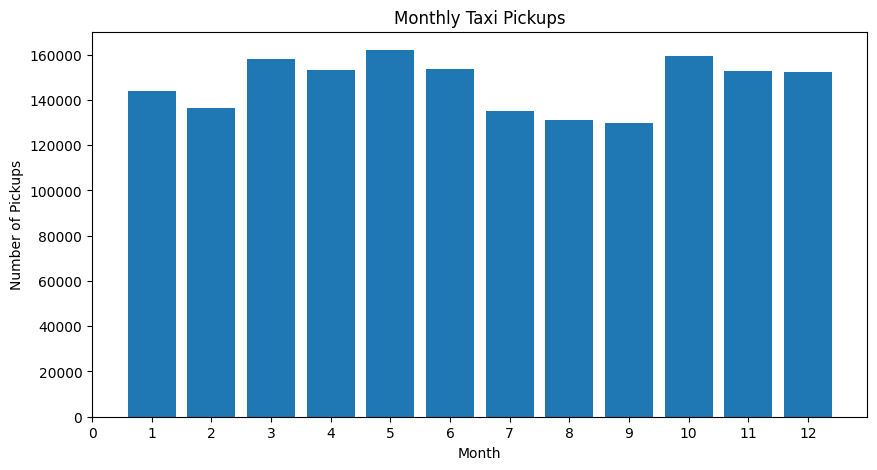

In [35]:
# Show the monthly trends in pickups

monthly_counts = df['tpep_pickup_datetime'].dt.month.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(13))
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [36]:
# Analyse the above parameters


finance_columns = ['Fare_amount', 'Tip_amount', 'Total_amount', 'Trip_distance']
finance_nonzero_df = df[(df[finance_columns] > 0).all(axis=1)]
#finance_nonzero_sample_df = finance_nonzero_df.sample(n=50, random_state=1)

plt.figure(figsize=(10, 10))
sns.pairplot(finance_nonzero_df[finance_columns], diag_kind='hist')
plt.suptitle("Financial Analysis Pairwise Relationships", y=1.02)
plt.show()

<Figure size 1000x1000 with 0 Axes>

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [37]:
# Create a df with non zero entries for the selected parameters.

finance_columns = ['Fare_amount', 'Tip_amount', 'Total_amount', 'Trip_distance']
df = df[(df[finance_columns] > 0).all(axis=1)]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

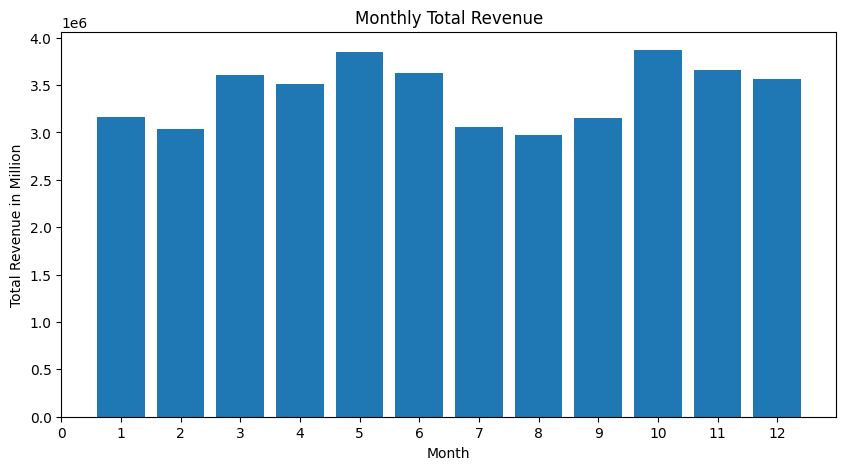

In [38]:
# Group data by month and analyse monthly revenue

monthly_counts = df['tpep_pickup_datetime'].dt.month
monthly_revenue = df.groupby(monthly_counts)['Total_amount'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue['tpep_pickup_datetime'], monthly_revenue['Total_amount'])
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue in Million')
plt.xticks(range(13))
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

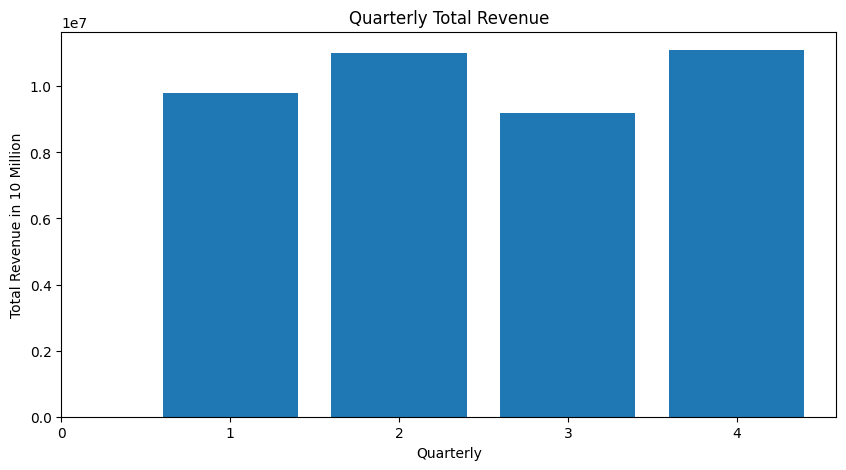

In [39]:
# Calculate proportion of each quarter

quarterly_counts = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby(quarterly_counts)['Total_amount'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(quarterly_revenue['tpep_pickup_datetime'], quarterly_revenue['Total_amount'])
plt.title('Quarterly Total Revenue')
plt.xlabel('Quarterly')
plt.ylabel('Total Revenue in 10 Million')
plt.xticks(range(5))
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

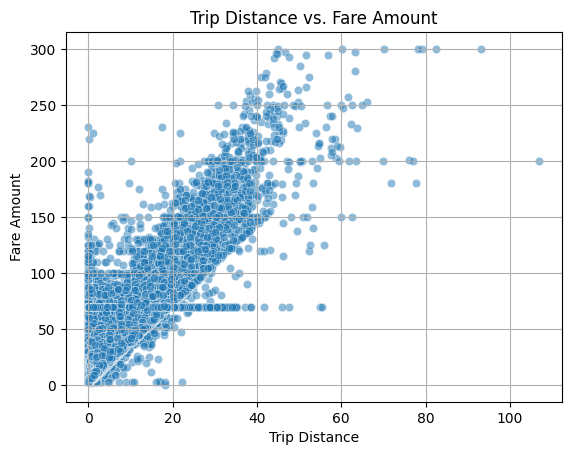

In [40]:
# Show how trip fare is affected by distance

sns.scatterplot(x='Trip_distance', y='Fare_amount', data=df, alpha=0.5)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

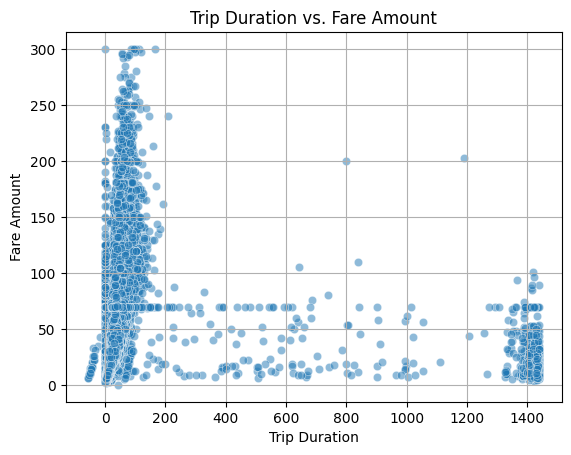

In [41]:
# Show relationship between fare and trip duration


df.loc[:, 'Trip_duration_in_minutes'] = ((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60).round(2)

sns.scatterplot(x='Trip_duration_in_minutes', y='Fare_amount', data=df, alpha=0.5)
plt.title('Trip Duration vs. Fare Amount')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()


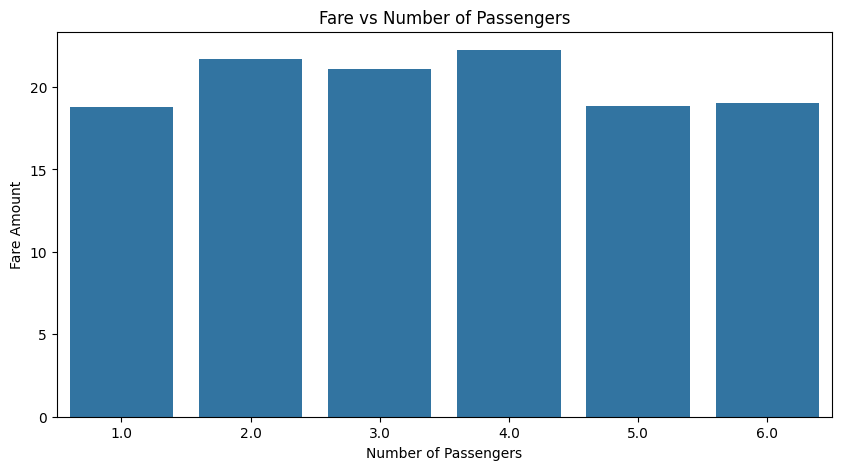

In [42]:
# Show relationship between fare and number of passengers

passenger_fare_group = df.groupby('Passenger_count')['Fare_amount'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Passenger_count', y='Fare_amount', data=passenger_fare_group)
plt.title('Fare vs Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.show()

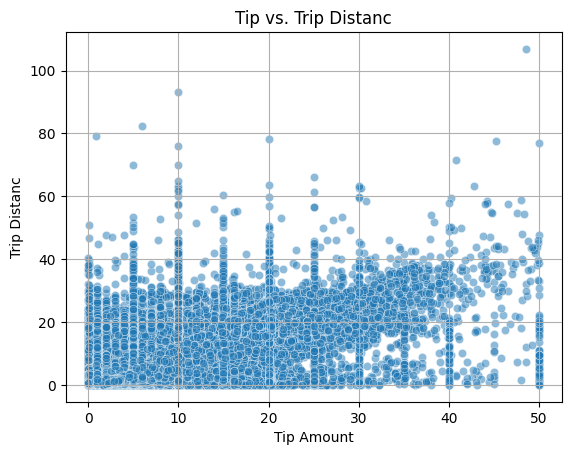

In [43]:
# Show relationship between tip and trip distance

sns.scatterplot(x='Tip_amount', y='Trip_distance', data=df, alpha=0.5)
plt.title('Tip vs. Trip Distanc')
plt.xlabel('Tip Amount')
plt.ylabel('Trip Distanc')
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [44]:
# Analyse the distribution of different payment types (payment_type).


#since the distribution gap is very huge so viisualise it as a table
payment_type_counts = df['Payment_type'].value_counts()
payment_type_df = pd.DataFrame({
    'Payment_type_name': payment_type_counts.index.map({1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}),
    'Count': payment_type_counts.values,
    'Percentage': (payment_type_counts / payment_type_counts.sum() * 100).round(2)
})
print(payment_type_df.to_markdown(index=False, numalign="left", stralign="left"))

| Payment_type_name   | Count   | Percentage   |
|:--------------------|:--------|:-------------|
| Credit Card         | 1388457 | 100          |
| Cash                | 19      | 0            |
| Dispute             | 19      | 0            |
| No Charge           | 5       | 0            |


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [45]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [48]:
# cha ange the directory to the root
import os
os.chdir(r"/")

In [49]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('content/Assignments/EDA/data_NYC_Taxi/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

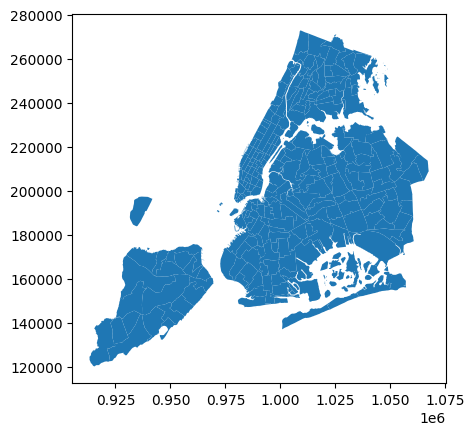

In [50]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [51]:
# Merge zones and trip records using locationID and PULocationID

zome_trip_merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [52]:
# Group data by location and calculate the number of trips

number_of_trips_df = zome_trip_merged_df.groupby('LocationID').size().reset_index(name='number_of_trips')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [53]:
# Merge trip counts back to the zones GeoDataFrame


zones = pd.merge(zones, number_of_trips_df, on ='LocationID')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

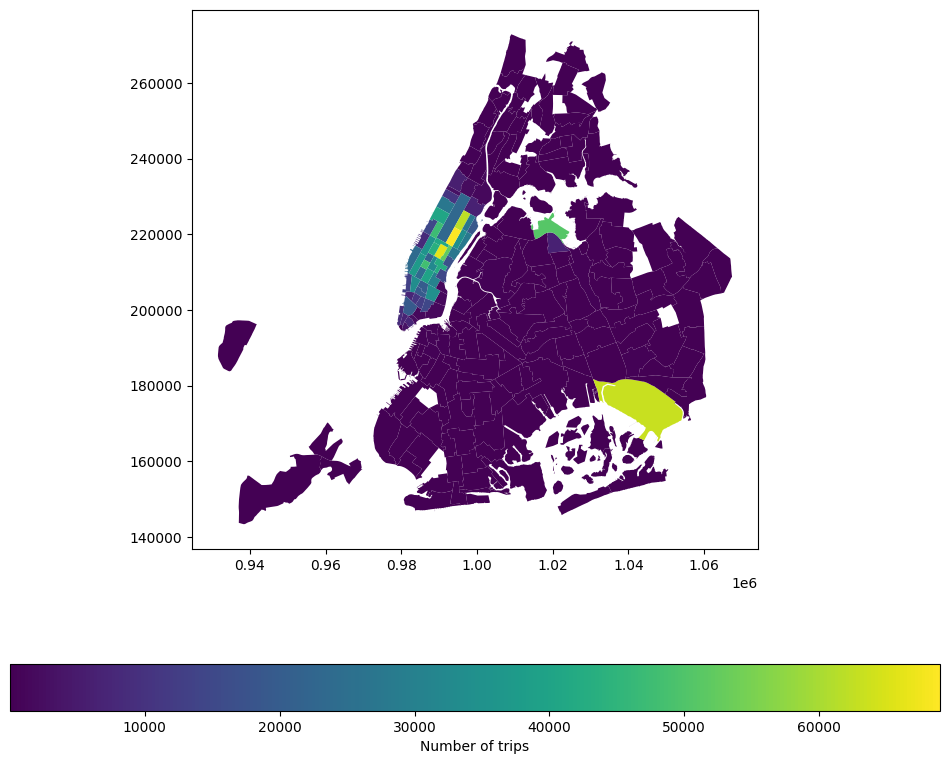

In [54]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'number_of_trips',
           ax = ax,
           legend = True,
           legend_kwds = {'label': "Number of trips", 'orientation': "horizontal"})
plt.show()


In [55]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values(by='number_of_trips')

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
1           2    0.433470    0.004866              Jamaica Bay           2   
4           6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
15         20    0.051440    0.000135                  Belmont          20   
14         19    0.101825    0.000547                Bellerose          19   
22         30    0.094510    0.000146            Broad Channel          30   
..        ...         ...         ...                      ...         ...   
135       162    0.035270    0.000048             Midtown East         162   
200       236    0.044252    0.000103    Upper East Side North         236   
107       132    0.245479    0.002038              JFK Airport         132   
134       161    0.035804    0.000072           Midtown Center         161   
201       237    0.042213    0.000096    Upper East Side South         237   

           borough                                           geometry  \
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
4    Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   
15           Bronx  POLYGON ((1016371.834 254183.401, 1016392.376 ...   
14          Queens  POLYGON ((1060888.899 212784.64, 1061115.169 2...   
22          Queens  POLYGON ((1034013.272 163473.152, 1034866.459 ...   
..             ...                                                ...   
135      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
200      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
107         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
134      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
201      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   

     number_of_trips  
1                  1  
4                  1  
15                 1  
14                 1  
22                 1  
..               ...  
135            52101  
200            61971  
107            63147  
134            66220  
201            68968  

[225 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [56]:
# Find routes which have the slowest speeds at different times of the day

zome_trip_merged_df['Speed'] = (zome_trip_merged_df['Trip_distance'] / zome_trip_merged_df['Trip_duration_in_minutes']).round(3)
zome_trip_merged_df['pickup_hour'] = zome_trip_merged_df['tpep_pickup_datetime'].dt.hour

grouped_speed = zome_trip_merged_df.groupby(['zone', 'pickup_hour'])['Speed'].mean().reset_index()
slowest_speeds = grouped_speed.groupby('pickup_hour')['Speed'].min().reset_index(name='min_speed')
slowest_routes = pd.merge(slowest_speeds, grouped_speed, left_on=['pickup_hour', 'min_speed'], right_on=['pickup_hour', 'Speed'])

slowest_routes[['zone', 'pickup_hour', 'min_speed']]

zone  pickup_hour  min_speed
0   Marine Park/Floyd Bennett Field            0   0.134000
1                     South Jamaica            1   0.100000
2              Flatbush/Ditmas Park            2   0.107500
3                  Hamilton Heights            3   0.103000
4                            Inwood            4   0.115000
5                 Crotona Park East            5   0.135000
6                      Forest Hills            6   0.146000
7                   Columbia Street            7   0.088000
8                  Prospect Heights            8   0.099000
9                          Longwood            9   0.090000
10         Washington Heights North           10   0.080000
11                     Forest Hills           11   0.091000
12          Queensbridge/Ravenswood           12   0.107333
13                  Carroll Gardens           13   0.055000
14                     Borough Park           14   0.065000
15                   Newark Airport           15   0.045000
16                    Prospect Park           16   0.059000
17             Flatbush/Ditmas Park           17   0.083000
18                      Brownsville           18   0.040000
19                      Cobble Hill           19   0.107429
20                        Homecrest           20   0.063000
21                      Old Astoria           21   0.134500
22                   Bushwick South           22   0.062000
23                     Howard Beach           23   0.130000

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

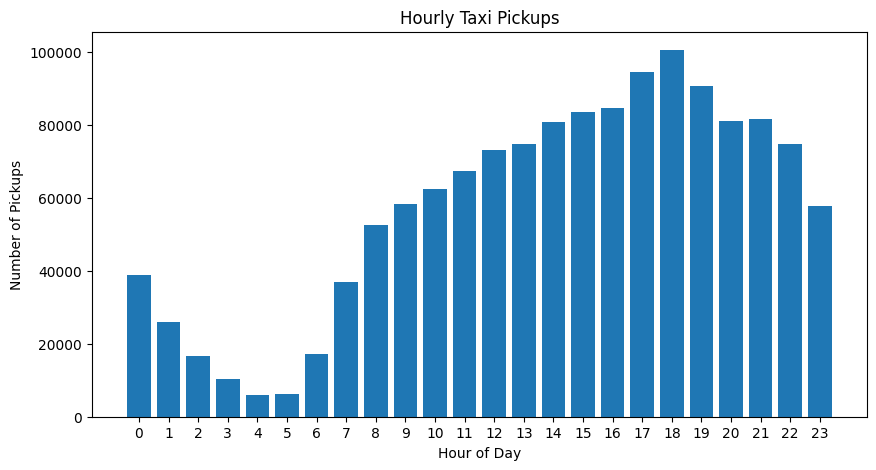

Businest hour =  18


In [57]:
# Visualise the number of trips per hour and find the busiest hour

pick_up_counts = zome_trip_merged_df['pickup_hour'].value_counts(sort = True)

plt.figure(figsize=(10, 5))
plt.bar(pick_up_counts.index, pick_up_counts.values)
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.show()

print('Businest hour = ', pick_up_counts.index[0])

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [58]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



SyntaxError: invalid syntax (<ipython-input-58-54f48ca11bd4>, line 4)

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

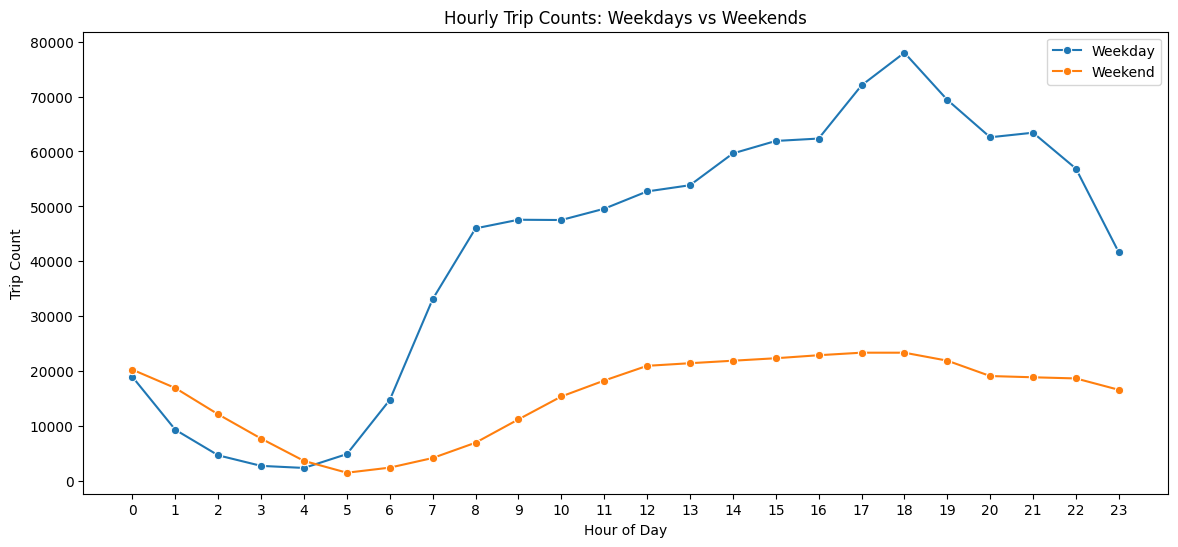

In [59]:
# Compare traffic trends for the week days and weekends

weekday_hourly_counts = df[df['tpep_pickup_datetime'].dt.dayofweek < 5]['tpep_pickup_datetime'].dt.hour.value_counts().sort_index().to_frame(name='weekday_count')
weekend_hourly_counts = df[df['tpep_pickup_datetime'].dt.dayofweek >= 5]['tpep_pickup_datetime'].dt.hour.value_counts().sort_index().to_frame(name='weekend_count')

plt.figure(figsize=(14, 6))
sns.lineplot(x='tpep_pickup_datetime', y='weekday_count', data=weekday_hourly_counts, label='Weekday', marker='o')
sns.lineplot(x='tpep_pickup_datetime', y='weekend_count', data=weekend_hourly_counts, label='Weekend', marker='o')
plt.title("Hourly Trip Counts: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.xticks(range(0, 24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [60]:
# Find top 10 pickup and dropoff zones

top_10_pickup_zones = zome_trip_merged_df.groupby('PULocationID')['zone'].value_counts(sort=True).nlargest(10)
top_10_drop_zones = zome_trip_merged_df.groupby('DOLocationID')['zone'].value_counts(sort=True).nlargest(10)

print('Top 10 Pickup Zones : \n', list(top_10_pickup_zones.index.get_level_values('zone')))
print('Top 10 Drop Zones : \n', list(top_10_drop_zones.index.get_level_values('zone')))

Top 10 Pickup Zones : 
 ['Upper East Side South', 'Midtown Center', 'JFK Airport', 'Upper East Side North', 'Midtown East', 'LaGuardia Airport', 'Penn Station/Madison Sq West', 'Lincoln Square East', 'Times Sq/Theatre District', 'Murray Hill']
Top 10 Drop Zones : 
 ['Upper East Side South', 'Upper East Side North', 'Upper East Side North', 'Upper East Side South', 'Midtown Center', 'Upper East Side South', 'Midtown Center', 'Lincoln Square East', 'Upper West Side South', 'Upper West Side South']


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [61]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

top_10_pickup_count = zome_trip_merged_df.groupby('zone')['PULocationID'].value_counts(sort=True).nlargest(10)
top_10_drop_count = zome_trip_merged_df.groupby('zone')['DOLocationID'].value_counts(sort=True).nlargest(10)

print('Top 10 Pickup Zones : \n', list(top_10_pickup_count.index.get_level_values('zone')))
print('Top 10 Drop Zones : \n', list(top_10_drop_count.index.get_level_values('zone')))

Top 10 Pickup Zones : 
 ['Upper East Side South', 'Midtown Center', 'JFK Airport', 'Upper East Side North', 'Midtown East', 'LaGuardia Airport', 'Penn Station/Madison Sq West', 'Lincoln Square East', 'Times Sq/Theatre District', 'Murray Hill']
Top 10 Drop Zones : 
 ['Upper East Side South', 'Upper East Side North', 'Upper East Side North', 'Upper East Side South', 'Midtown Center', 'Upper East Side South', 'Midtown Center', 'Lincoln Square East', 'Upper West Side South', 'Upper West Side South']


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [62]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hour_trip = zome_trip_merged_df[(zome_trip_merged_df['pickup_hour'] <= 5) | (zome_trip_merged_df['pickup_hour'] >= 23)]
top_10_night_pickup_zones = night_hour_trip.groupby('PULocationID')['zone'].value_counts(sort=True).nlargest(10)
top_10_night_drop_zones = night_hour_trip.groupby('DOLocationID')['zone'].value_counts(sort=True).nlargest(10)

print('Top 10 Night Pickup Zones : \n', list(top_10_night_pickup_zones.index.get_level_values('zone')))
print('Top 10 Night Drop Zones : \n', list(top_10_night_drop_zones.index.get_level_values('zone')))

Top 10 Night Pickup Zones : 
 ['East Village', 'West Village', 'JFK Airport', 'Lower East Side', 'Clinton East', 'Greenwich Village South', 'Times Sq/Theatre District', 'Penn Station/Madison Sq West', 'Midtown South', 'LaGuardia Airport']
Top 10 Night Drop Zones : 
 ['West Village', 'East Village', 'Lower East Side', 'East Village', 'East Village', 'Clinton East', 'East Village', 'East Village', 'East Village', 'Greenwich Village South']


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [63]:
# Filter for night hours (11 PM to 5 AM)

night_hour_trip = zome_trip_merged_df[(zome_trip_merged_df['pickup_hour'] <= 5) | (zome_trip_merged_df['pickup_hour'] >= 23)]
day_hour_trip = zome_trip_merged_df[(zome_trip_merged_df['pickup_hour'] > 5) & (zome_trip_merged_df['pickup_hour'] < 23)]

print('Night Time Trip Revenue : ', night_hour_trip['Total_amount'].sum().round(2))
print('Day Time Trip Revenue : ', day_hour_trip['Total_amount'].sum().round(2))

Night Time Trip Revenue :  4863234.23
Day Time Trip Revenue :  35812929.65


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

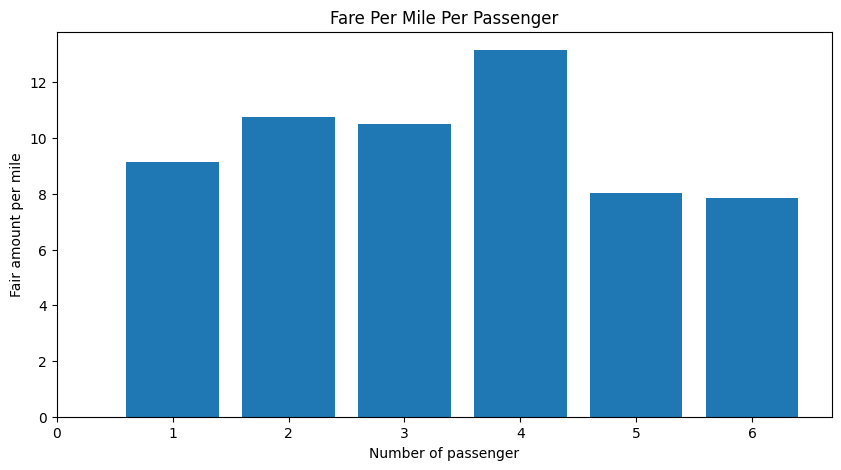

In [64]:
# Analyse the fare per mile per passenger for different passenger counts


df['Fare_amount_per_mile'] = (df['Fare_amount'] / df['Trip_distance']).round(2)
fare_price_passenger_count = df.groupby('Passenger_count')['Fare_amount_per_mile'].mean().round(2)

plt.figure(figsize=(10, 5))
plt.bar(fare_price_passenger_count.index, fare_price_passenger_count.values)
plt.title('Fare Per Mile Per Passenger')
plt.xlabel('Number of passenger')
plt.ylabel('Fair amount per mile')
plt.xticks(range(7))
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

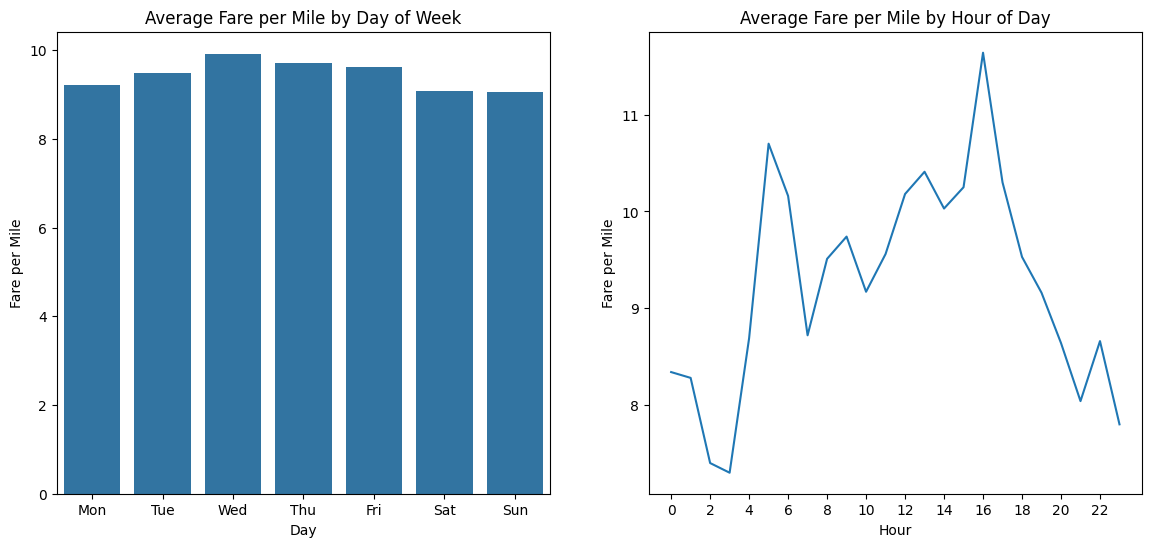

In [65]:
# Compare the average fare per mile for different days and for different times of the day

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
# Compare average fare per mile by day of the week
avg_fare_by_day = df.groupby('day_of_week')['Fare_amount_per_mile'].mean().round(2).reset_index()
avg_fare_by_day.columns = ['Day of Week', 'Average Fare per Mile']

day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
avg_fare_by_day['Day of Week'] = avg_fare_by_day['Day of Week'].map(day_map)

# Compare average fare per mile by hour of day
avg_fare_by_hour = df.groupby('pickup_hour')['Fare_amount_per_mile'].mean().round(2).reset_index()
avg_fare_by_hour.columns = ['Hour of Day', 'Average Fare per Mile']

# Plotting
plt.figure(figsize=(14, 6))

# Plot 1: By day of week
plt.subplot(1, 2, 1)
sns.barplot(x='Day of Week', y='Average Fare per Mile', data=avg_fare_by_day)
plt.title('Average Fare per Mile by Day of Week')
plt.ylabel('Fare per Mile')
plt.xlabel('Day')

# Plot 2: By hour of day
plt.subplot(1, 2, 2)
sns.lineplot(x='Hour of Day', y='Average Fare per Mile', data=avg_fare_by_hour)
plt.title('Average Fare per Mile by Hour of Day')
plt.ylabel('Fare per Mile')
plt.xticks(range(0, 24,2))
plt.xlabel('Hour')

plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Text(0.5, 0, 'Vendor')

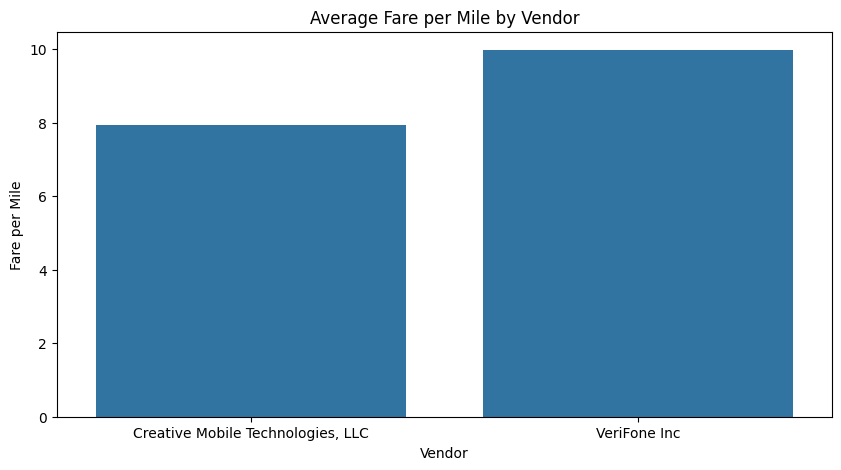

In [66]:
# Compare fare per mile for different vendors

avg_fare_by_vendor = df.groupby('VendorID')['Fare_amount_per_mile'].mean().round(2).reset_index()
avg_fare_by_vendor.columns = ['Vendor', 'Average Fare per Mile']

vendor_names = {1: 'Creative Mobile Technologies, LLC', 2: 'VeriFone Inc'}
avg_fare_by_vendor['Vendor'] = avg_fare_by_vendor['Vendor'].map(vendor_names)

plt.figure(figsize=(10, 5))
sns.barplot(x='Vendor', y='Average Fare per Mile', data=avg_fare_by_vendor)
plt.title('Average Fare per Mile by Vendor')
plt.ylabel('Fare per Mile')
plt.xlabel('Vendor')

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Text(0.5, 0, 'Trip Distance Tier')

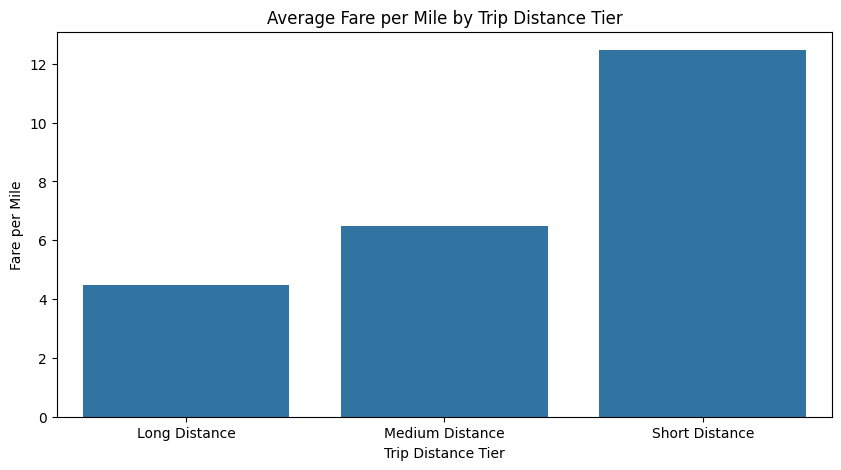

In [67]:
# Defining distance tiers

def assign_tier(distance):
    if distance <= 2:
        return 'Short Distance'
    elif 2 < distance <= 5:
        return 'Medium Distance'
    else:
        return 'Long Distance'

df['Trip_distance_tier'] = df['Trip_distance'].apply(assign_tier)

avg_fare_by_trip_distance_tier = df.groupby('Trip_distance_tier')['Fare_amount_per_mile'].mean().round(2).reset_index()
avg_fare_by_trip_distance_tier.columns = ['Trip_distance_tier', 'Average Fare per Mile']

plt.figure(figsize=(10, 5))
sns.barplot(x='Trip_distance_tier', y='Average Fare per Mile', data=avg_fare_by_trip_distance_tier)
plt.title('Average Fare per Mile by Trip Distance Tier')
plt.ylabel('Fare per Mile')
plt.xlabel('Trip Distance Tier')

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

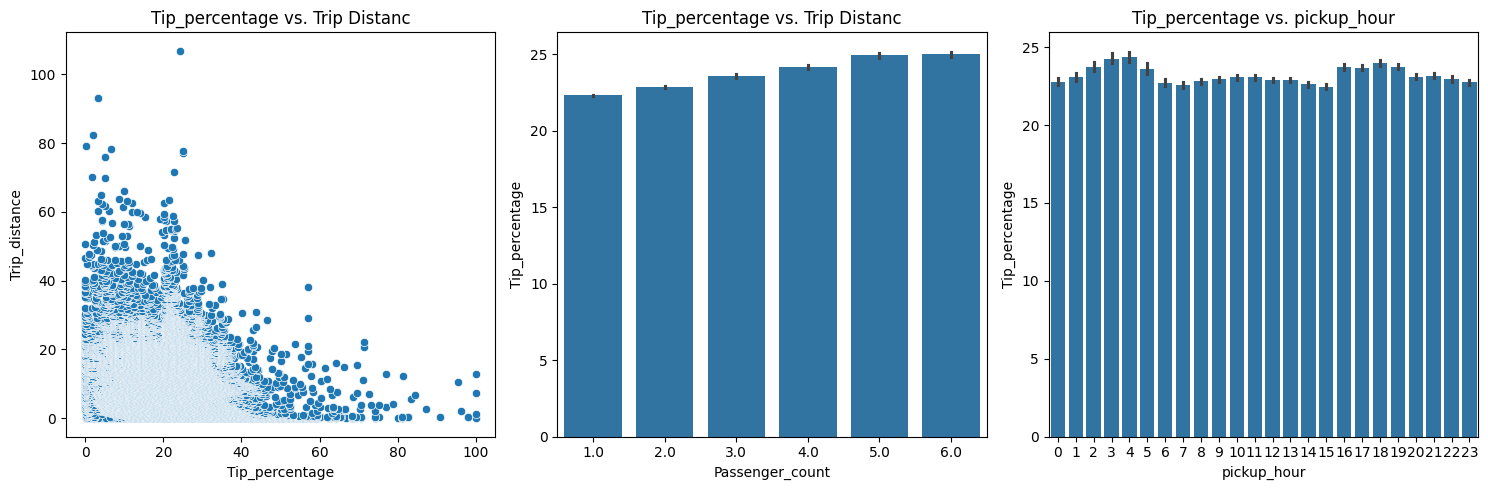

In [68]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['Tip_percentage'] = (df['Tip_amount'] / df['Fare_amount']) * 100
df = df[(df['Tip_percentage'] <= 100)]
tips_factor = df.groupby(['Trip_distance', 'Passenger_count', 'pickup_hour'])['Tip_percentage'].mean().round(2).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='Tip_percentage', y='Trip_distance', data=tips_factor, ax=axes[0])
axes[0].set_title('Tip_percentage vs. Trip Distanc')

sns.barplot(y='Tip_percentage', x='Passenger_count', data=tips_factor, ax=axes[1])
axes[1].set_title('Tip_percentage vs. Trip Distanc')

sns.barplot(x='pickup_hour', y='Tip_percentage', data=tips_factor, ax=axes[2])
axes[2].set_title('Tip_percentage vs. pickup_hour')

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

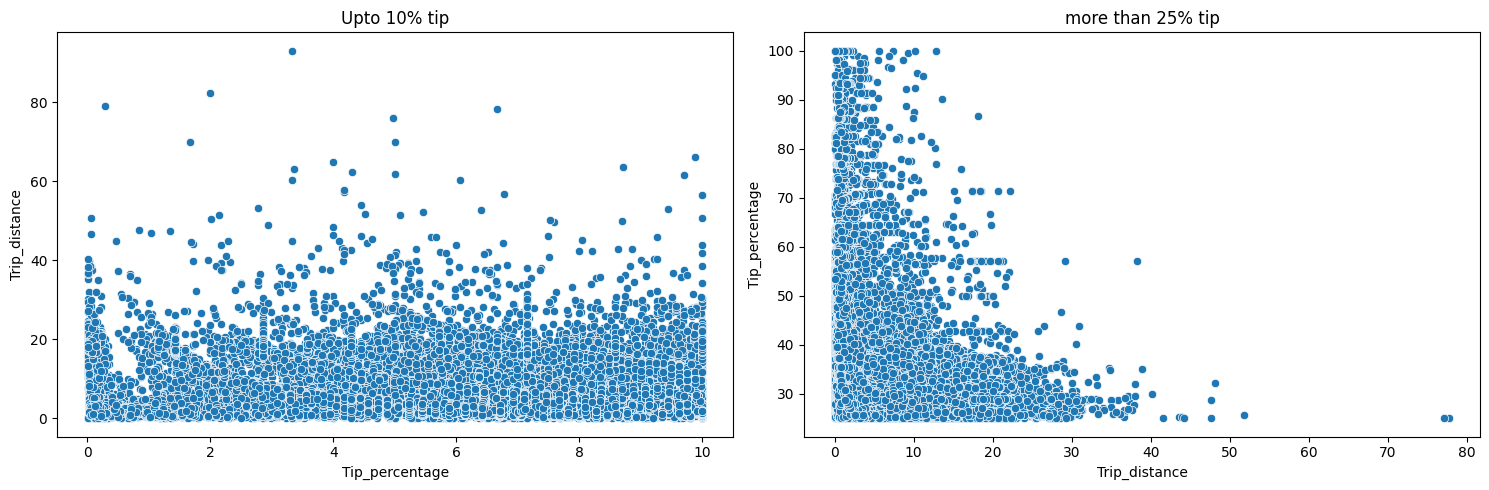

In [69]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

tip_upto_10_df = df[df['Tip_percentage'] <= 10]
tip_above_25_df = df[df['Tip_percentage'] >= 25]

df.groupby(['Trip_distance'])['Tip_percentage'].mean().round(2).reset_index()



fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x='Tip_percentage', y='Trip_distance', data=tip_upto_10_df, ax=axes[0])
axes[0].set_title('Upto 10% tip')

sns.scatterplot(y='Tip_percentage', x='Trip_distance', data=tip_above_25_df, ax=axes[1])
axes[1].set_title('more than 25% tip')

plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

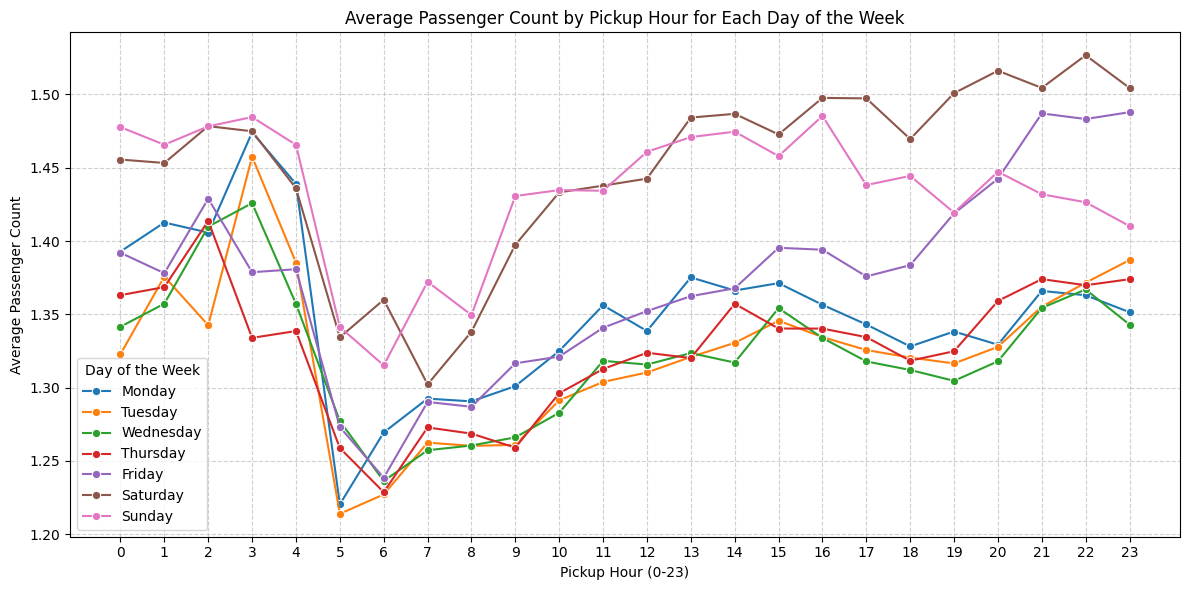

In [70]:
# See how passenger count varies across hours and days


average_passengers = df.groupby(['day_of_week', 'pickup_hour'])['Passenger_count'].mean().reset_index(name='avg_passenger_count')

# Convert 'day_of_week' to a more readable format if needed
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_passengers['day_name'] = average_passengers['day_of_week'].map(day_mapping)

# Use seaborn for better aesthetics and handling categorical 'day_name'
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_passengers, x='pickup_hour', y='avg_passenger_count', hue='day_name', marker='o')

# Add labels and title
plt.xlabel('Pickup Hour (0-23)')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Pickup Hour for Each Day of the Week')
plt.xticks(range(24))  # Ensure all pickup hours are displayed
plt.legend(title='Day of the Week')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [71]:
# How does passenger count vary across zones

passenger_count_by_zone = zome_trip_merged_df.groupby('zone')['Passenger_count'].mean().round(0).reset_index()
passenger_count_by_zone.columns = ['zone', 'Average_passenger_count']

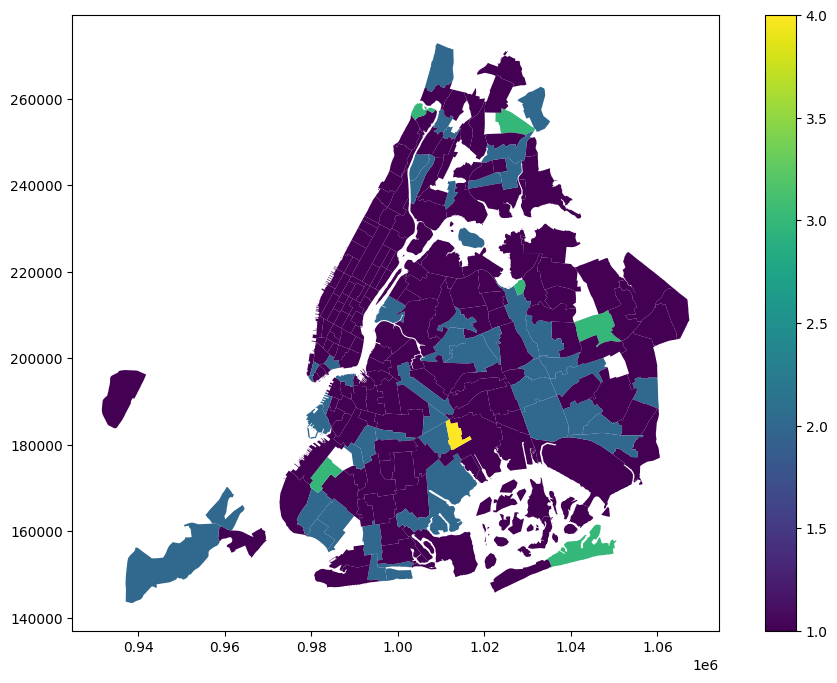

In [72]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_passenger_count = zones.merge(passenger_count_by_zone, on='zone', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_with_passenger_count.plot(
    column='Average_passenger_count',
    ax=ax,
    legend=True
)


plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

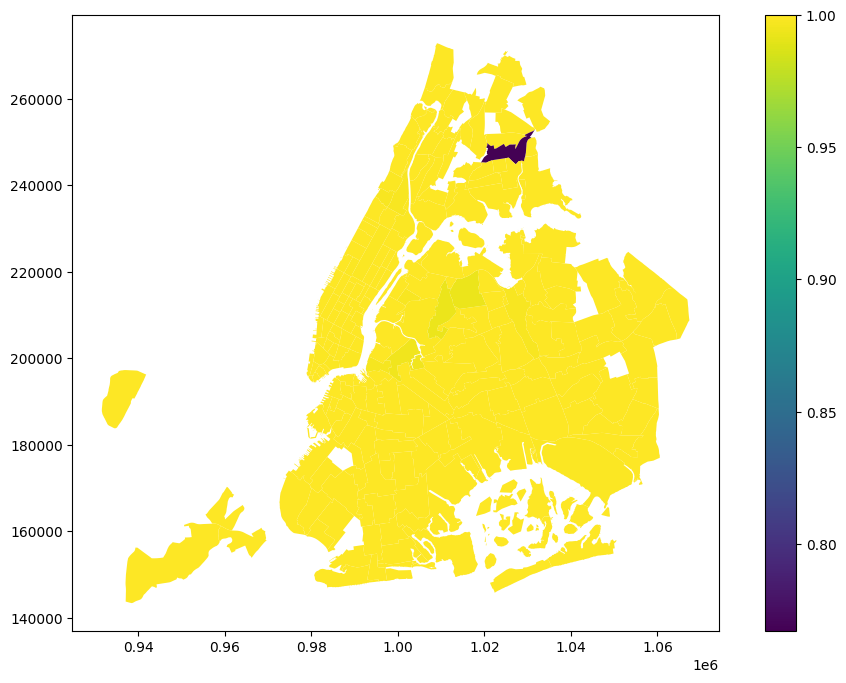

In [75]:
# How often is each surcharge applied?

improvement_surcharge_zone = zome_trip_merged_df.groupby('zone')['Improvement_surcharge'].mean().round(3).reset_index()
improvement_surcharge_zone.columns = ['zone', 'Average_Improvement_surcharge']

zones_with_improvement_surcharge = zones.merge(improvement_surcharge_zone, on='zone', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_with_improvement_surcharge.plot(
    column='Average_Improvement_surcharge',
    ax=ax,
    legend=True
)


plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.